<a href="https://colab.research.google.com/github/JonatasLemos/DataAnalysisProjects/blob/main/wikipediaAnalysis/CitizensWikipediaPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ploting Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading CSV and sorting

In [ ]:
path_start = "/content/drive/MyDrive/Colab Data/"
df_cities = pd.read_csv(f"{path_start}merged_cities_famous.csv")
df_cities.drop(["Unnamed: 0"],axis=1,inplace=True)
select = df_cities["CIDADAOS ILUSTRES"] > 0
df_cities = df_cities[select]
df_cities.head()

,CIDADE,CIDADAOS ILUSTRES,POPULAÇÃO ESTIMADA
0,Belo Horizonte,624,2502557
1,Juiz de Fora,154,555284
2,Uberaba,72,322126
3,São João del Rei,67,89378
4,Ouro Preto,58,74036


## Ploting 

In [ ]:
title_font = 20
label_font = 14
plt.rcParams["figure.figsize"] = [9, 6]
def plot_bar(*args,suptitle=True):
  plt.barh(args[0],args[1])
  if suptitle:
    plt.suptitle(args[-1],fontsize=title_font)
  plt.title(args[2],fontsize=label_font)
  plt.xlabel(args[3],fontsize=label_font)
  plt.xticks(fontsize=label_font)
  plt.yticks(fontsize=label_font)
  plt.ylabel('Cidade',fontsize=label_font)
  plt.grid(lw="0.2")
  plt.show()

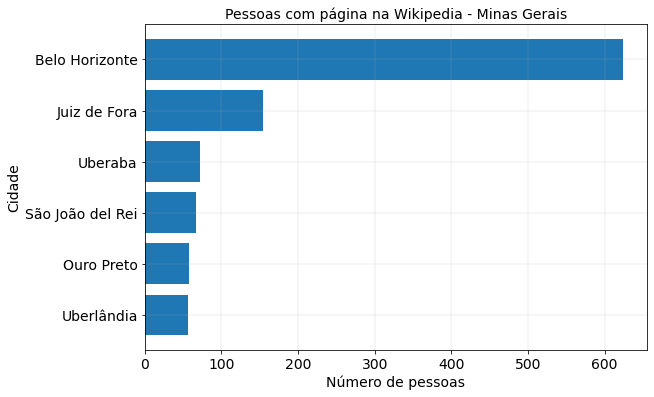

In [ ]:
df_cities.sort_values(by="CIDADAOS ILUSTRES",inplace=True,ascending=True)
plot_bar(df_cities["CIDADE"].tail(6),df_cities["CIDADAOS ILUSTRES"].tail(6),
         "Pessoas com página na Wikipedia - Minas Gerais",'Número de pessoas',suptitle=False)

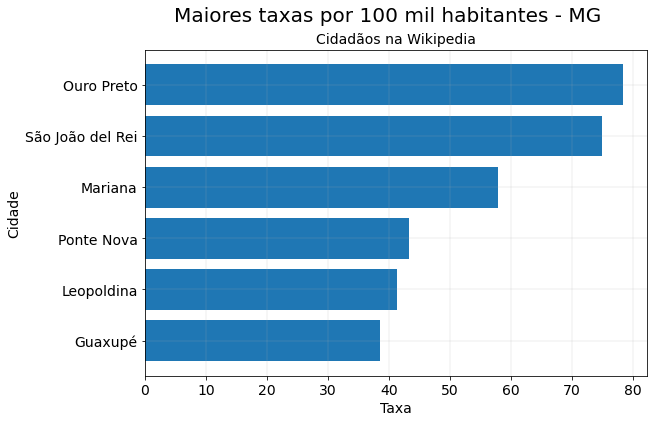

In [ ]:
df_cities["CIDADAOS ILUSTRES POR 100000"] = round((df_cities["CIDADAOS ILUSTRES"]/df_cities["POPULAÇÃO ESTIMADA"])*100000,2)
df_cities.sort_values(by="CIDADAOS ILUSTRES POR 100000", ascending=True,inplace=True)
plot_bar(df_cities["CIDADE"].tail(6),df_cities["CIDADAOS ILUSTRES POR 100000"].tail(6),
         "Cidadãos na Wikipedia",'Taxa','Maiores taxas por 100 mil habitantes - MG')

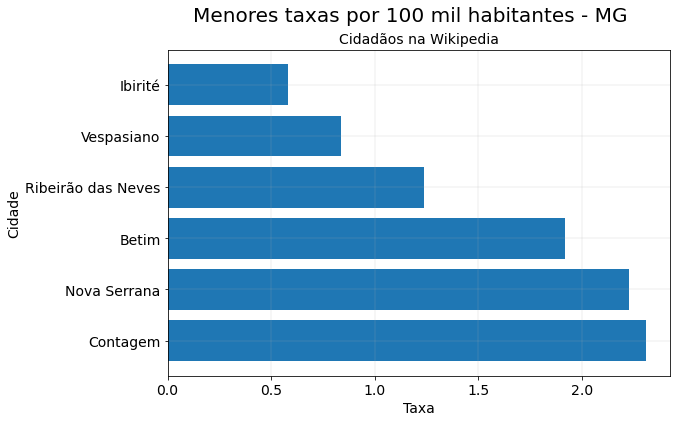

In [ ]:
df_cities.sort_values(by="CIDADAOS ILUSTRES POR 100000", ascending=False,inplace=True)
plot_bar(df_cities["CIDADE"].tail(6),df_cities["CIDADAOS ILUSTRES POR 100000"].tail(6),
         "Cidadãos na Wikipedia",'Taxa','Menores taxas por 100 mil habitantes - MG')

## Ploting rate

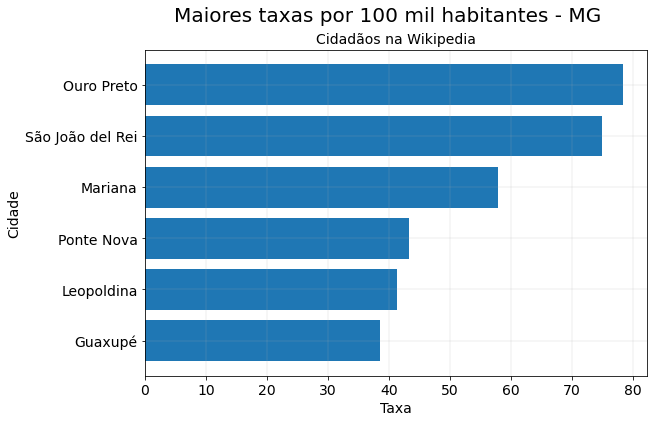

In [ ]:
select = df_cities["POPULAÇÃO ESTIMADA"] > 50000
df_cities = df_cities[select]
df_cities.sort_values(by="CIDADAOS ILUSTRES POR 100000", ascending=True,inplace=True)
plot_bar(df_cities["CIDADE"].tail(6),df_cities["CIDADAOS ILUSTRES POR 100000"].tail(6),
         "Cidadãos na Wikipedia",'Taxa',"Maiores taxas por 100 mil habitantes - MG")